In [105]:
using LinearAlgebra
using Plots
using LaTeXStrings
using Printf

# Joao pedro de Moraes Bonucci - 218733

### 1. Partindo da implementação do método de Jacobi abaixo, escreva uma variante que implementa o método de Gauss-Seidel.

In [106]:
function jacobi(A, b, maxiters = 100, prec = 1.0e-5)
	n = length(b) # n eh o total de equacoes no sistema
	x = 1.0 ./ diag(A) .* b # D^{-1} * b
	# Cria um vetor do mesmo tipo e comprimento de x
	xnovo = similar(x)
	iters = 0
	while iters < maxiters && norm(A*x - b) > prec
		for i = 1:n
			xnovo[i] = b[i]
			for j = 1:i - 1
				xnovo[i] = xnovo[i] - A[i, j]*x[j]
			end
			for j = i + 1:n
				xnovo[i] = xnovo[i] - A[i, j]*x[j]
			end
			xnovo[i] = xnovo[i] / A[i, i]
		end
		# Copia o valor de xnovo sobre x, coordenada a coordenada
		x .= xnovo
		iters = iters + 1
	end
	return x
end

jacobi (generic function with 3 methods)

A diferenca entre o metodo de gauss-jacobi e o de gaus-seidel esta na utilizacao dos dados recem computados em gauss-seidel, ou seja se temos um sistema linear com variaveis $x_1^{k}$ e $x_2{k}$ ao inves de calcularmos $x_1^{k+1}$ e $x_2^{k+1}$ com $x_1^k$ e $x_2^k$, calculamos $x_2^{k+1}$ com $x_1^{k+1}$ e $x_2^k$ e para adaptar o codigo acima precisamos apenas fazer com que os termos 1 ate i-1 do laco sejam calculados com os resultados ja obtidos.

In [108]:
function seidel(A, b, maxiters = 100, prec = 1.0e-5)
	n = length(b) # n eh o total de equacoes no sistema
	x = 1.0 ./ diag(A) .* b # D^{-1} * b
	# Cria um vetor do mesmo tipo e comprimento de x
	xnovo = similar(x)
	iters = 0
	while iters < maxiters && norm(A*x - b) > prec
		for i = 1:n
			xnovo[i] = b[i]
			for j = 1:i - 1
				xnovo[i] = xnovo[i] - A[i, j]*xnovo[j]
			end
			for j = i + 1:n
				xnovo[i] = xnovo[i] - A[i, j]*x[j]
			end
			xnovo[i] = xnovo[i] / A[i, i]
		end
		# Copia o valor de xnovo sobre x, coordenada a coordenada
		x .= xnovo
		iters = iters + 1
	end
	return x
end

seidel (generic function with 3 methods)

### 2. Qual o número de FLOPs executado pelo método de Jacobi a cada iteração? Justifique a sua resposta.

O metodo de jacobi consiste em iterar por n - 1 variaveis ao longo de n equacoes, como mostrado no algoritmo da questao anterior. 

Como cada variavel consequentemente precisa de um FLOP para ser multiplicada pelo seu coeficiente e outro FLOP para ser adicionada ao resultado atualizado, sabemos que cada variavel precisa de 2 FLOPs para ser devidamente computada no metodo, no entanto a variavel estudada no momento ainda precis passar por uam divisao ao final das iteracoes por uma equacao (i.e. ao fim do laco mais interno). Com isso, temos $n(2\cdot(n-1) + 1) = 2n^2 - n$ FLOPs por iteracao.

### 3.Considere o sistema linear
$\begin{align*}
\begin{bmatrix}
4 & 3 & 2\\
1 & 5 & 0\\
1 & 1 & 3
\end{bmatrix} x =
& 
\begin{bmatrix}
4 \\
9 \\
4
\end{bmatrix}
\end{align*}$

#### (a) É possível garantir facilmente a convergência do método de Jacobi para esse sistema (justifique)?

Sabemos que um criterio para garantir convergencia de metodos iterativos eh que a matriz B possua norma menor que 1.

Tambem sabemos que a funcao de iteracao eh da forma:
$$\phi(x) = B^J x + c$$

Para ver como esse criterio se aplica ao metodo de jacobi podemos dividir essa matriz a, no caso a matriz acima, em uma decomposicao A = L + D + U sendo L,D e U as submatrizes inferior a diagonal principal, a diagonal principal e superior a diagonal principal, respectivamente. Com isso temos que o sistema
$$ Ax^* = b \rightarrow (L + D + U)x^* = b \rightarrow Dx^* = -(L + U)x^* + b \rightarrow$$
$$x^* = -D^{-1}(L+U)x^* + D^{-1}b = \phi(x^*)$$

e daqui tiramos que $B^J = -D^{-1}(L+U)$ e $c=D^{-1}b$

Como precisamos que $||B^J|| < 1$ para garantir convergencia e sabendo que o resultado da operacao $-D^{-1}(L+U)x^*$ eh sempre uma matriz do tipo

$
\begin{bmatrix}
0 & a_{12}/a_{11} & ... & a_{1n}/a_{11}\\
a_{21}/a_{22} & 0 & ... & a_{2n}/a_{22}\\
... & ... & ... & ...\\
a_{n1}/a_{nn} & a_{n2}/a_{nn} & ...  & 0
\end{bmatrix}
$

Com isso para garantir que a matriz $B^J$ possui norma menor que 1 precisamos apenas checar se a seguinte inequacao eh satisfeita:
$$|a_{ii}| > \sum^n_{k=1,k\neq i} |a_{ik}|$$
ou seja, precisamos checar se a matriz eh diagonalmente dominante por linhas.

No caso da matriz acima, podemos perceber que:
$$ 4 > 1 + 1$$
$$ 5 > 3 + 1$$
$$ 3 > 2 + 0$$

Portanto, pelo criterio das linhas, a matriz teoricamente converge pelo metodo de gauss-jacobi

#### (b) Realiza três iterações do método de Jacobi a partir de x 0 = (1, 1, 1) t . Calcule o resíduo a cada iteração, ou seja ||Ax − b||. O que parece que está ocorrendo? Há alguma contradição com a sua resposta do item (a)?

Sistema a ser resolvido:
$$ 4x_1 = 4 - 3x_2 - 2x_3 $$
$$ 5x_2 = 9 - x_1 - 0x_3 $$
$$ 3x_3 = 4 - x_1 - x_2 $$

Condicao inicial:
$\begin{align*}
x_0 = \begin{bmatrix}
1 \\
1 \\
1 
\end{bmatrix}
& 
b = \begin{bmatrix}
4 \\
9 \\
4
\end{bmatrix}
\end{align*}$

In [110]:
A = [1 3 2 ; 1 5 0 ; 1 1 3]
b = [4 ; 9 ; 4]
x = [1 ; 1 ; 1]

print("residuo: ",round.(norm(A*x - b), digits=3))

residuo: 3.742

Iteracao 1:
$$ 4x_1 = 4 - 3\cdot 1 - 2\cdot 1 $$
$$ 5x_2 = 9 - 1 - 0\cdot 1 $$
$$ 3x_3 = 4 - 1 - 1 $$

$\begin{align*}
x_1 = \begin{bmatrix}
-1/4 \\
8/5 \\
2/3 
\end{bmatrix}
& 
b = \begin{bmatrix}
4 \\
9 \\
4
\end{bmatrix}
\end{align*}$

In [111]:
x = [-1/4 ; 8/5 ; 2/3]
print("residuo: ",round.(norm(A*x - b), digits=3))

residuo: 2.352

Iteracao 2:
$$ 4x_1 = 4 - 3\cdot 8/5 - 2\cdot 2/3 $$
$$ 5x_2 = 9 + 1/4 - 0\cdot 2/3 $$
$$ 3x_3 = 4 + 1/4 - 8/5 $$

$\begin{align*}
x_2 = \begin{bmatrix}
-8/15 \\
37/20 \\
53/60 
\end{bmatrix}
& 
b = \begin{bmatrix}
4 \\
9 \\
4
\end{bmatrix}
\end{align*}$

In [112]:
x = [-8/15 ; 37/20 ; 53/60]
print("residuo: ",round.(norm(A*x - b), digits=3))

residuo: 2.798

Iteracao 3:

$$ 4x_1 = 4 - 3\cdot (-8/15) - 2\cdot 53/60 $$
$$ 5x_2 = 9 + 8/15 - 0\cdot 53/60 $$
$$ 3x_3 = 4 + 8/15 - 37/20 $$

$\begin{align*}
x_3 = \begin{bmatrix}
-199/240 \\
143/75 \\
161/180 
\end{bmatrix}
& 
b = \begin{bmatrix}
4 \\
9 \\
4
\end{bmatrix}
\end{align*}$

In [113]:
x = [-199/240 ; 143/75 ; 161/180]
print("residuo: ",round.(norm(A*x - b), digits=3))

residuo: 2.707

Apesar da terceira iteracao apresentar residuo menor que o valor originalmente proposto, podemos ver que da primeira para a terceira iteracao a solucao parece divergir. Contrariando a conclusao do item anterior (item a).

No entanto, tres iteracoes formam um conjunto de dados muito pequeno para analizarmos se o metodo converge ou diverge da solucao para esse caso.

### 4. Represente graficamente o sistema não linear abaixo e use a figura para encontrar uma solução dos sistemas por inspeção. Se quiser, use o computador para desenhar a figura para você. Em seguida, confirme que a solução encontrada é exata avaliando as funções no ponto encontrado. Por fim, simule a execução do método de Newton partindo de x 0 = (1.05, 1.07) t e até que a a distância do ponto x k obtido e uma raiz seja menor que 10 −4 .Quantas iterações foram necessárias.

$$ x^2_1 + x^2_2 = 2$$ 
$$e^{x_1 −1} + x^3_2 = 2.$$

Obs: Para simular o método de Newton você pode usar os computador
para resolver os sistemas lineares intermediários, mas precisa colocar in-
formação de todos os passos, inclusive com uma indicação aproximada dos
sistemas que foram resolvidos.

$$ x^2_1 + x^2_2 = 2 \rightarrow  x_2 = \sqrt{2 - x^2_1}$$ 
$$e^{x_1 −1} + x^3_2 = 2 \rightarrow  x_2 = (2 - e^{x_1 −1})^{1/3}$$

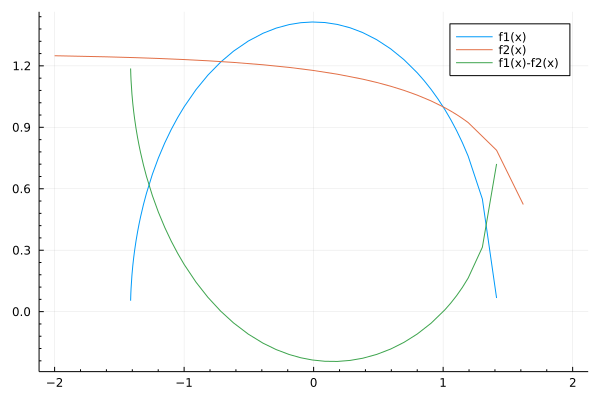

In [114]:
f1(x) = sqrt(2-x^2)
f2(x) = (2 - exp(x - 1))^(1/3)
f3(x) = (2 - exp(x - 1))^(1/3) - sqrt(2-x^2)
plot([f1,f2,f3], -2, 2, label = ["f1(x)" "f2(x)" "f1(x)-f2(x)"], minorticks=true)

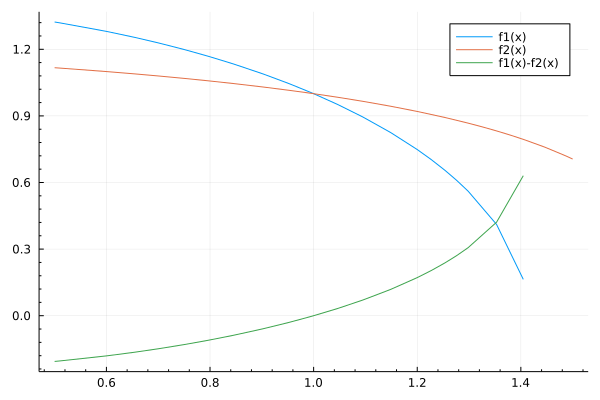

In [115]:
plot([f1,f2,f3], 0.5, 1.5, label = ["f1(x)" "f2(x)" "f1(x)-f2(x)"], minorticks=true)

Pelos graficos acima podemos perceber que existem duas raizes para o sistema, sendo que uma delas aparenta ter valor exato = 1.

Agora para a segunda parte do ex vamos utilizar o metodo de Newton partindo de $x_0 = (1.05, 1.07)$ com criterio de parada sendo uma precisao melhor que $10 ^ {-4}$.

Esse problema consistem em achar uma raiz da equacao $$f(x) = (2 - exp(x - 1))^{1/3} - \sqrt{2-x^2}$$

cuja derivada primeira eh dada por
$$ f'(x) = \frac{x}{\sqrt{2 - x^2}} - \frac{e^{x-1}}{3 (2 e - e^x)^{2/3}}$$

Agora para resolver sistemas por newton precisamos utilizar duas formulas:

$$J(x)s = -F(x)$$ 
$$\text{ e }$$ 
$$x_{k+1} = s + x_k$$

$$ x^2_1 + x^2_2 -2 = 0$$ 
$$e^{x_1 −1} + x^3_2 - 2 = 0$$

$
F(x_1,x_2) = 
\begin{bmatrix}
x^2_1 + x^2_2 -2\\
e^{x_1 −1} + x^3_2 - 2
\end{bmatrix} = 0
$
$
J(x) = \begin{bmatrix}
2x_1   2x_2\\
e^{x_1 - 1}   3x_2^2
\end{bmatrix}
$

$
x_0 = \begin{bmatrix}
1.05 \\
1.07
\end{bmatrix}
$

Sistema para encontrar o s:

$\begin{align} 
\begin{bmatrix}
2x_1   2x_2\\
e^{x_1 - 1}   3x_2^2
\end{bmatrix} s =
&
-1 \begin{bmatrix}
x^2_1 + x^2_2 -2\\
e^{x_1 −1} + x^3_2 - 2
\end{bmatrix}
\end{align}$

Iteracao 1:

$\begin{align} 
\begin{bmatrix}
2(1.05)   2(1.07)\\
e^{1.05 - 1}   3(1.07)^2
\end{bmatrix} s =
&
-1 \begin{bmatrix}
(1.05)^2 + (1.07)^2 -2\\
e^{(1.05) −1} + (1.07)^3 - 2
\end{bmatrix}
\end{align}$

$
s = \begin{bmatrix}
-0.05207\\
-0.06451
\end{bmatrix}
$

$\begin{align}
x_{k+1} = x_k + s = 
\begin{bmatrix}
1.05-0.05207\\
1.07-0.06451
\end{bmatrix} =
&
\begin{bmatrix}
0.99793\\
1.00549
\end{bmatrix}
\end{align}$

Iteracao 2:

$\begin{align} 
\begin{bmatrix}
2(0.99793)   2(1.00549)\\
e^{0.99793 - 1}   3(1.00549)^2
\end{bmatrix} s =
&
-1 \begin{bmatrix}
(0.99793)^2 + (1.00549)^2 -2\\
e^{(0.99793) −1} + (1.00549)^3 - 2
\end{bmatrix}
\end{align}$

$
s = \begin{bmatrix}
0.00204\\
-0.00545
\end{bmatrix}
$

$\begin{align}
x_{k+1} = x_k + s = 
\begin{bmatrix}
0.99793+0.00204\\
1.00549-0.00545
\end{bmatrix} =
&
\begin{bmatrix}
0.99997\\
1.00004
\end{bmatrix}
\end{align}$

Como $1-0.99997 = 0.00003$ e $1 - 1.00004 = -0.00004$ e ambos possuem um erro menor que $10^{-4}$ o criterio de para foi satisfeito e precisamos de 2 iteracoes do metodo de newton para chegar do $x_0$ proposto para um resultado com o precisao pedida.

### 5. Exiba graficamente os pontos amostrados abaixo e ajuste, por quadrados mínimos, a curva $φ(x) = c_1 e^{−x} + c_2 + c_3 e^x$ . Qual é o resíduo quadrático,

$$ x | -2.00 | -1.00 | +0.00 | +1.00 | +2.00 | +3.00$$
$$ y | +9.10 | +3.14 | +1.39 | +1.82 | +4.83 | +13.52$$

### ou seja, o valor de $||Φc − y||^2$ que é minimizado no método dos quadrados mínimos?

Obs: Indique claramente qual sistema deve ser resolvido em função da
matriz Φ. A resolução do sistema pode ser feita em um computador.

Primeiro vamos plotar o grafico de uma curva generica com a forma dada e os pontos dados:

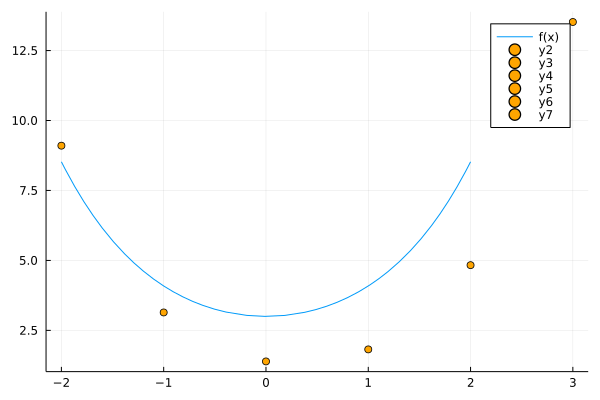

In [116]:
a = 1
b = 1
c = 1
f(x) = a*exp(-x) + b*1 + c*exp(x)
plot(f, -2, 2, label="f(x)")
scatter!([-2 -1 0 1 2 3], [9.1 3.14 1.39 1.82 4.83 13.52], c = :orange)

Agora precisamos descobrir os coeficientes da curva que melhor representem o conjunto de pontos dado.

ouseja precisamos encontrar $\phi(x) = c_1 e^{−x} + c_2 + c_3 e^x$

que minimize a equacao:

$$ ||\phi - y||^2 = \sum_{i=1}^m (\phi(x_i)-y_i)^2 $$

onde temos que $\phi = (\phi(x_1),\phi(x_2),...,\phi(x_m))^T$ e $y = (y_1,y_2,...,y_m)^T$

sendo m o total de pontos dados

podemos reescrever a notacao anterior com um produto matrix vetor:
$$ \phi = \boldsymbol{\phi}c $$
onde 

$\begin{align*}
\boldsymbol{\phi} = \begin{bmatrix}
e^{-x_1} & 1 & e^{x_1}\\
e^{-x_2} & 1 & e^{x_2}\\
... & ... & ...\\
e^{-x_m} & 1 & e^{x_m}
\end{bmatrix}
& 
c = \begin{bmatrix}
c_1 \\
c_2 \\
c_3
\end{bmatrix}
\end{align*}$

Portanto o objetivo eh minimizar $||\boldsymbol{\phi}c - y||^2 \rightarrow (\boldsymbol{\phi}c - y)^T(\boldsymbol{\phi}c - y)$

em outras palavras, precisamos calcular o gradiente da funcao acima:
$$\nabla (||\boldsymbol{\phi}c - y||^2) = 2\cdot \boldsymbol{\phi}^T \boldsymbol{\phi} c - 2\cdot \boldsymbol{\phi}^T y = \rightarrow \boldsymbol{\phi}^T \boldsymbol{\phi} c = \boldsymbol{\phi}^T y$$

$\boldsymbol{\phi}^T \boldsymbol{\phi} = 
\begin{pmatrix}
\frac{e^{10}+e^8+e^6+e^4+e^2+1}{e^6} & \frac{e^5+e^4+e^3+e^2+e+1}{e^3} & 6 \\
\frac{e^5+e^4+e^3+e^2+e+1}{e^3} & 6 & \frac{1+e+e^2+e^3+e^4+e^5}{e^2}\\
6 & \frac{1+e+e^2+e^3+e^4+e^5}{e^2} & \frac{1+e^2+e^4+e^6+e^8+e^{10}}{e^4}
\end{pmatrix}$

$\boldsymbol{\phi}^T \boldsymbol{\phi} \approx 
\begin{pmatrix}
63.1433358063769 & 11.6603397201656 & 6\\
11.6603397201656 & 6 & 31.6960895749854\\ 
6 & 31.6960895749854 & 466.56965054693535
\end{pmatrix}$

$\boldsymbol{\phi}^T y \approx 
\begin{pmatrix}
79.16214058293202502 \\
33.8\\
315.96956144527832
\end{pmatrix}$

Com isso temos que os coeficientes ideias sao $c = [1.29411, -0.57904, 0.69991]$

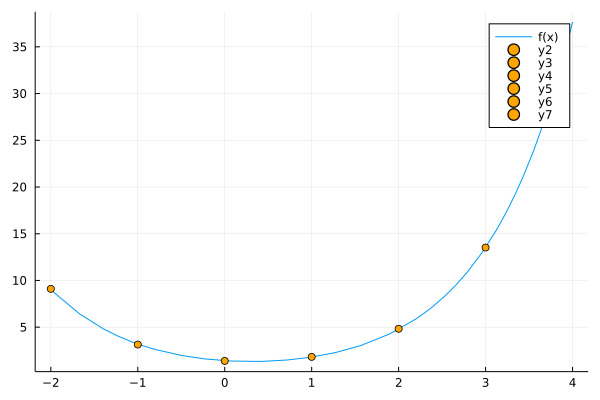

In [117]:
a = 1.29411
b = -0.57904
c = 0.69991
f(x) = a*exp(-x) + b*1 + c*exp(x)
plot(f, -2, 4, label="f(x)")
scatter!([-2 -1 0 1 2 3], [9.1 3.14 1.39 1.82 4.83 13.52], c = :orange)

In [118]:
y = [9.1 ; 3.14 ; 1.39 ; 1.82 ; 4.83 ; 13.52]
c = [1.29411; -0.57904; 0.69991]
phi = [exp(2) 1 exp(-1) ;
exp(1) 1 exp(-1) ;
exp(0) 1 exp(0) ;
exp(-1) 1 exp(1) ;
exp(-2) 1 exp(2) ;
exp(-3) 1 exp(3) ]

println("norma minimizada:",norm(phi * c - y)^2)

norma minimizada:0.028416094565852805


### 6. Esse exercício tenta "ensinar"que as vezes ajustes que não parecem lineares podem ser transformados em ajustes lineares. Considere que queremos ajustar uma curva na forma $\phi(x) = α\sqrt{xe^{βx}}$ para diferentes valores de α e β. Com respeito a esses parâmetros não é possível fazer ajuste linear. O principal problema é que essa função é escrita como produto de outras funções e não soma. Mas há uma forma de contornar isso:

#### (a) Considere $\hat{\phi}(x) = log_eφ(x)$. Mostre que $\hat{\phi}(x)$ pode ser vista como combinação linear de uma função com parâmetro fixo mais duas duas funções com parâmetros livres que podem ser facilmente calculados a partir de α e β e vice-versa. Note que, ao fazer isso, é possível ajustar $\hat{\phi}(x)$ e partir dos seus parâmetros obter parâmetros de α e β que ajustam $\phi(x)$.

Podemos manipular a equacao dada ao utilizarmos o logaritmo e suas propriedades. dessa forma:
$$\phi(x) = α\sqrt{xe^{\beta x}} \rightarrow log(\phi(x)) = log(\alpha\sqrt{xe^{βx}}) \rightarrow$$
$$log(\phi(x)) = log(\alpha) + \frac{(\beta x)}{2} + \gamma \frac{log(x)}{2}$$

#### (b) Usando a ideia sugerida acima, ajuste $\phi(x_i ) ≈ y_i$ :

$$ x | +1.00 | +1.50 | +2.00 | +2.50 | +3.00 | +4.00 | +5.00 | +6.00$$
$$ y | +1.72 | +1.90 | +1.99 | +2.01 | +2.00 | +1.89 | +1.73 | +1.55$$

Obs: Indique claramente qual sistema deve ser resolvido em função da
matriz $\phi$. A resolução do sistema pode ser feita em um computador.
E observe que estou pedindo para ajustar $\phi ≈ y$ e não $\hat{\phi}≈ y$.

Agora seguindo a teoria explicada no ex anterior e sabendo que:

$\begin{align*}
\boldsymbol{\phi} = \begin{bmatrix}
1 & \frac{(x_1)}{2} & \frac{log(x_1)}{2}\\
1 & \frac{(x_2)}{2} & \frac{log(x_2)}{2}\\
... & ... & ...\\
1 & \frac{(x_m)}{2} & \frac{log(x_m)}{2}\\
\end{bmatrix}
& 
c = \begin{bmatrix}
log(\alpha) \\
\beta \\
\gamma
\end{bmatrix}
\end{align*}$

precismos resolver a equacao:
$$\boldsymbol{\phi}^T \boldsymbol{\phi} c = \boldsymbol{\phi}^T log(y)$$

dessa fez precisamos considerar o log de y pois tivemos que passar a equacao original tambem para o log. E vale mencionar que o coeficiente gamma esta ali para ilustracao, mas nao afetara o resultado, pois este paresentara um valor igual ou muito proximo de 1.

In [191]:
log_a = 1
b = 1
c = 1

x = [1.00 1.50 2.00 2.50 3.00 4.00 5.00 6.00]
y = [1.72 ; 1.90 ; 1.99 ; 2.01 ; 2.00 ; 1.89 ; 1.73 ; 1.55]
log_y = []
c = [log_a ; b ; c]

# monta a matrix phi
phi = fill(0.0, (length(x),3))
for i in 1:length(x)
	phi[i,1] = 1.0
	phi[i,2] = x[i]/2
	phi[i,3] = log(x[i])/2
end

# encontra a transposta de phi
phi_T = transpose(phi)

# transforma os valores de y
for i in 1:length(y)
	push!(log_y,log(y[i]))
end

In [203]:
# encontra os melhores parametros
c_result = inv(phi_T * phi)*(phi_T * log_y)
c_result

3-element Vector{Any}:
  0.7404896068054061
 -0.39916107985011706
  1.0004153912415745

Pelo resultado acima encontramos os valores otimos de $\alpha$ e $\beta$ para os pontos dados. Porem precisamos reverter o valor de $log(\alpha)$

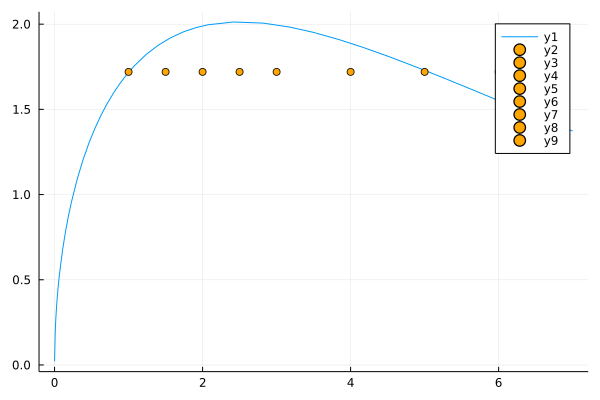

In [202]:
# retorna o valor de alpha do log
a = 2.7182818284590^c_result[1]

# retorna o valor de beta e gama
b = c_result[2]
c = c_result[3]

f(x) = a * sqrt(x^c*2.7182818284590^(b*x))
plot(f,0.0001,7)
scatter!(x, y, c = :orange)